# Project and Presentation - Text Analytics
## Aaron Bromeland

### Purpose
    - To obtain data from the SEC edgar search and stock market to see the impact of reportings to the SEC on stock valuation of Deere & Co. Will look to develop a model with Deere and then try to apply it to other companies within the industry and then potentially other companies outside of the Agricultural/Construction and Forestry Industry. 
    
    


#### Obtain SEC Filing Data

In [23]:
# imports required
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import re

In [24]:
# Get Data on all documents filed for Deere&Co with the SEC recently
data = requests.get('https://data.sec.gov/submissions/CIK0000315189.json',headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'})
data = json.loads(data.content)['filings']['recent']

In [25]:

# Convert Items to data frame and then sort data frame by filing date. 
df = pd.DataFrame.from_dict(data)

# Filter on only 8-K,10-K,and 10-Q filings
#df = df[(df['form']=='8-K') | (df['form']=='10-K') | (df['form']=='10-Q')]


df.sort_values(by='filingDate',ascending=False,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000315189-22-000016,2022-05-31,2022-05-26,2022-05-31T17:23:01.000Z,,4/A,,,,5012,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT
1,0001558370-22-009519,2022-05-31,2022-05-31,2022-05-31T08:35:14.000Z,34,8-K,001-04121,22980681,"5.02,7.01,9.01",225690,1,1,de-20220531x8k.htm,8-K
2,0000315189-22-000015,2022-05-31,2022-05-26,2022-05-31T16:59:24.000Z,,4,,,,33968,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT
3,0000315189-22-000014,2022-05-31,2022-05-26,2022-05-31T14:43:18.000Z,,4,,,,59067,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT
4,0001104659-22-065984,2022-05-27,,2022-05-27T16:48:50.000Z,34,IRANNOTICE,001-04121,22978525,,11971,0,0,tm2217194d1_irannotice.htm,IRANNOTICE


In [26]:
# Get text data for all the files and save it in the text column of the data frame
df['text'] = [requests.get(f'https://www.sec.gov/Archives/edgar/data/315189/{re.sub("-","",accessionNumber)}/{filename}',headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'}).content for accessionNumber, filename in zip(df['accessionNumber'],df['primaryDocument'])]
df.head()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,text
0,0000315189-22-000016,2022-05-31,2022-05-26,2022-05-31T17:23:01.000Z,,4/A,,,,5012,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01..."
1,0001558370-22-009519,2022-05-31,2022-05-31,2022-05-31T08:35:14.000Z,34,8-K,001-04121,22980681,"5.02,7.01,9.01",225690,1,1,de-20220531x8k.htm,8-K,b'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n...
2,0000315189-22-000015,2022-05-31,2022-05-26,2022-05-31T16:59:24.000Z,,4,,,,33968,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01..."
3,0000315189-22-000014,2022-05-31,2022-05-26,2022-05-31T14:43:18.000Z,,4,,,,59067,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01..."
4,0001104659-22-065984,2022-05-27,,2022-05-27T16:48:50.000Z,34,IRANNOTICE,001-04121,22978525,,11971,0,0,tm2217194d1_irannotice.htm,IRANNOTICE,b'<DOCUMENT>\n<TYPE>IRANNOTICE\n<SEQUENCE>1\n<...


In [27]:
# Use Beautiful soup to just obtain the text data in the files. This will be used for the analysis
df['text'] = [BeautifulSoup(x,'html.parser').get_text() for x in df['text']]
df.head()

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,text
0,0000315189-22-000016,2022-05-31,2022-05-26,2022-05-31T17:23:01.000Z,,4/A,,,,5012,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4/A\n\n\nSEC Fo...
1,0001558370-22-009519,2022-05-31,2022-05-31,2022-05-31T08:35:14.000Z,34,8-K,001-04121,22980681,"5.02,7.01,9.01",225690,1,1,de-20220531x8k.htm,8-K,\n\n\n\n\n\n0000315189falseDEERE & CO000031518...
2,0000315189-22-000015,2022-05-31,2022-05-26,2022-05-31T16:59:24.000Z,,4,,,,33968,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
3,0000315189-22-000014,2022-05-31,2022-05-26,2022-05-31T14:43:18.000Z,,4,,,,59067,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
4,0001104659-22-065984,2022-05-27,,2022-05-27T16:48:50.000Z,34,IRANNOTICE,001-04121,22978525,,11971,0,0,tm2217194d1_irannotice.htm,IRANNOTICE,\nIRANNOTICE\n1\ntm2217194d1_irannotice.htm\nI...


In [53]:
# View an example of the text data that was obtained.
df['text'][1]

'\n\n\n\n\n\n0000315189falseDEERE & CO0000315189us-gaap:CommonStockMember2022-05-312022-05-310000315189de:Debentures6.55PercentDue2028Member2022-05-312022-05-3100003151892022-05-312022-05-31UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549\u200b\u200b\u200b\u200bFORM\xa08-K\u200bCURRENT REPORTPursuant to Section 13 OR 15(d)\xa0of The Securities Exchange Act of 1934Date of Report: May 31, 2022(Date of earliest event reported)DEERE & COMPANY(Exact name of registrant as specified in its charter)\u200b\u200b\u200b\u200b\u200bDelaware\u200b1-4121\u200b36-2382580(State or other jurisdiction of incorporation)\u200b(Commission File Number)\u200b(IRS Employer Identification No.)One John Deere PlaceMoline,\xa0Illinois 61265(Address of principal executive offices and zip code)(309) 765-8000(Registrant’s telephone number, including area code)___________________________________________________(Former name or former address, if changed since last report.)Check the appropriate box

In [43]:
df.tail()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,text
995,0000315189-11-000041,2011-11-07,2011-09-30,2011-11-07T17:20:44.000Z,34,13F-HR,028-00850,111185525,,112305,0,0,sep1113f.txt,DEERE & COMPANY 13F-HR,\n13F-HR\n1\nsep1113f.txt\nDEERE & COMPANY 13F...
996,0000315189-11-000039,2011-10-03,2011-09-30,2011-10-03T11:12:38.000Z,,4,,,,5674,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
997,0000315189-11-000038,2011-10-03,2011-09-30,2011-10-03T10:54:30.000Z,,4,,,,5874,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
998,0000315189-11-000037,2011-10-03,2011-09-30,2011-10-03T10:19:03.000Z,,4,,,,5885,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
999,0001104659-11-054439,2011-10-03,2011-10-03,2011-10-03T09:00:29.000Z,34,8-K,001-04121,111118557,7.01,28980,0,0,a11-27268_18k.htm,8-K,\n8-K\n1\na11-27268_18k.htm\n8-K\n\n\n\n\n\n\n...


In [45]:
df.shape

(1000, 15)

In [32]:
# Save the data to a csv file so it can be used later 
df.to_csv('Deere.csv')

#### Obtain Stock Market Data

In [35]:
# needed imports
#!pip install yfinance
import yfinance as yf

In [46]:
# Download Stock prices for Deere from 2014 to Current
de_df = yf.download('DE',start='2011-10-03',end='2022-06-05',progress=False)
de_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-03,63.900002,64.730003,61.630001,61.720001,49.448978,7637000
2011-10-04,60.730000,63.619999,59.919998,63.480000,50.859062,8600000
2011-10-05,63.740002,66.459999,63.099998,66.160004,53.006229,5073200
2011-10-06,65.779999,67.220001,64.580002,66.570000,53.334709,5691600
2011-10-07,67.080002,67.220001,65.000000,65.699997,52.637684,5400200


In [47]:
# Remove Date from the index
de_df.reset_index(inplace=True)
de_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-03,63.900002,64.730003,61.630001,61.720001,49.448978,7637000
1,2011-10-04,60.730000,63.619999,59.919998,63.480000,50.859062,8600000
2,2011-10-05,63.740002,66.459999,63.099998,66.160004,53.006229,5073200
3,2011-10-06,65.779999,67.220001,64.580002,66.570000,53.334709,5691600
4,2011-10-07,67.080002,67.220001,65.000000,65.699997,52.637684,5400200


In [48]:
# Check Date for Plot
de_df['Date'].dtype

dtype('<M8[ns]')

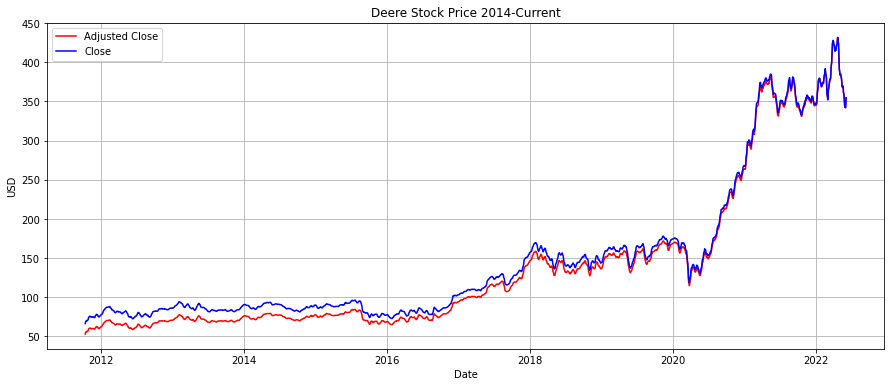

In [49]:
# Graph Close and Adjusted Close for Deere Stock
import matplotlib.pyplot as plt                      
%matplotlib inline

plt.figure(figsize=(15, 6))
plt.plot(de_df.Date, de_df['Adj Close'].rolling(window=7).mean(), "-r", label="Adjusted Close")
plt.plot(de_df.Date, de_df['Close'].rolling(window=7).mean(), "-b", label="Close")
plt.legend(loc="upper left")
plt.title("Deere Stock Price 2014-Current")
plt.xlabel("Date")
plt.ylabel("USD")
plt.grid(axis='both')
plt.show()

In [50]:
# Write Data to CSV file to be used later in the analysis
de_df.to_csv("DE_PRICE.csv")

In [52]:
de_df.shape

(2686, 7)